## Prog 5: Write a python program to predict income levels of adult individuals  using Decision  Tree  Model.  The process   includes   training,   testing   and   evaluating   the model  on  the  Adult  dataset.  

In  this experiment you  need  to  train  a  classifier  on  the  "adult"  dataset,  and predict whether an individual’s income is greater or less than $50,000. Perform  basic  data  processing  operations, split  the  dataset  into  training  and  test  sets,  train  the model,    score    the    test  dataset,    and    evaluate    the predictions.


Dataset: The Adult dataset is from the Census Bureau and the task is to predict whether a given adult earns more than $50,000 a year or not based attributes such as education, hours of work per week, etc..
URL: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset/download?datasetVersionNumber=2

It has a total of 15 columns, 
Target Column is "Income", The income is divide into two classes: <=50K and >50K
Number of attributes: 14, These are the demographics and other features to describe a person

14 attributes are:

- Age.
- Workclass.
- Final Weight.
- Education.
- Education Number of Years.
- Marital-status.
- Occupation.
- Relationship.
- Race.
- Gender.
- Capital-gain.
- Capital-loss.
- Hours-per-week.
- Native-country.
The dataset contains missing values that are marked with a question mark character (?).
There are a total of 48,842 rows of data, and 3,620 with missing values, leaving 45,222 complete rows.
There are two class values ‘>50K‘ and ‘<=50K‘, i.e., it is a binary classification task. 

In [1]:
#Required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read dataset
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
df.shape

(48842, 15)

In [6]:
# See the columns that contain a "?" and how many "?" are there in those columns
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
#Replace ? with NaN 
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df['native-country'] = df['native-country'].replace('?', np.nan)

In [8]:
#Now the ? has been replaced by NaN, so count of ? is 0
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
#Check missing values - NaN values
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [10]:
#Drop all rows that contain a missing value
df.dropna(how='any', inplace=True)

In [11]:
#Check duplicate values in dataframe now
print(f"There are {df.duplicated().sum()} duplicate values")

There are 47 duplicate values


In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(45175, 15)

In [14]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [15]:
#Drop non-relevant columns
df.drop(['fnlwgt','educational-num','marital-status','relationship', 'race',], axis = 1, inplace = True)

In [16]:
df.columns

Index(['age', 'workclass', 'education', 'occupation', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [17]:
#Extract X and y from the dataframe , income column is the target column, rest columns are features
X = df.loc[:,['age', 'workclass', 'education', 'occupation', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country']]
y = df.loc[:,'income']

In [18]:
X.head()

,age,workclass,education,occupation,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Machine-op-inspct,Male,0,0,40,United-States
1,38,Private,HS-grad,Farming-fishing,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Protective-serv,Male,0,0,40,United-States
3,44,Private,Some-college,Machine-op-inspct,Male,7688,0,40,United-States
5,34,Private,10th,Other-service,Male,0,0,30,United-States


In [19]:
y.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
5    <=50K
Name: income, dtype: object

In [20]:
# Since y is a binary categorical column we will use label encoder to convert it into numerical columns with values 0 and 1
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y = pd.DataFrame(y)
y.head()

,0
0,0
1,0
2,1
3,1
4,0


In [21]:
#First identify caterogical features and numeric features
numeric_features = X.select_dtypes('number')
categorical_features = X.select_dtypes('object')
categorical_features

,workclass,education,occupation,gender,native-country
0,Private,11th,Machine-op-inspct,Male,United-States
1,Private,HS-grad,Farming-fishing,Male,United-States
2,Local-gov,Assoc-acdm,Protective-serv,Male,United-States
3,Private,Some-college,Machine-op-inspct,Male,United-States
5,Private,10th,Other-service,Male,United-States
...,...,...,...,...,...
48837,Private,Assoc-acdm,Tech-support,Female,United-States
48838,Private,HS-grad,Machine-op-inspct,Male,United-States
48839,Private,HS-grad,Adm-clerical,Female,United-States
48840,Private,HS-grad,Adm-clerical,Male,United-States


In [22]:
numeric_features

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
5,34,0,0,30
...,...,...,...,...
48837,27,0,0,38
48838,40,0,0,40
48839,58,0,0,40
48840,22,0,0,20


In [23]:
#Convert categorical features into numeric
converted_categorical_features = pd.get_dummies(categorical_features)
converted_categorical_features.shape

(45175, 80)

In [24]:
#combine the converted categorical features and the numeric features together into a new dataframe called "newX"
all_features = [converted_categorical_features, numeric_features]
newX = pd.concat(all_features,axis=1, join='inner')
newX.shape

(45175, 84)

In [26]:
newX.columns

Index(['workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_10th',
       'education_11th', 'education_12th', 'education_1st-4th',
       'education_5th-6th', 'education_7th-8th', 'education_9th',
       'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors',
       'education_Doctorate', 'education_HS-grad', 'education_Masters',
       'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'oc

In [27]:
#Do a train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.33, random_state=42)

In [28]:
# Load Decision Tree Classifier, max_depth = 5 and fit it with X-train and y-train
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [29]:
# Make predictions
y_pred = clf.predict(X_test)

In [30]:
y_test.shape

(14908, 1)

In [31]:
y_pred.shape

(14908,)

In [32]:
predictions_df = pd.DataFrame()
predictions_df['precdicted_salary_class'] = y_pred
predictions_df['actual_salary_class'] = y_test[0].values
predictions_df

,precdicted_salary_class,actual_salary_class
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
14903,0,0
14904,0,1
14905,0,0
14906,0,0


In [33]:
#Evaluate the performance of fitting
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.8196941239602897


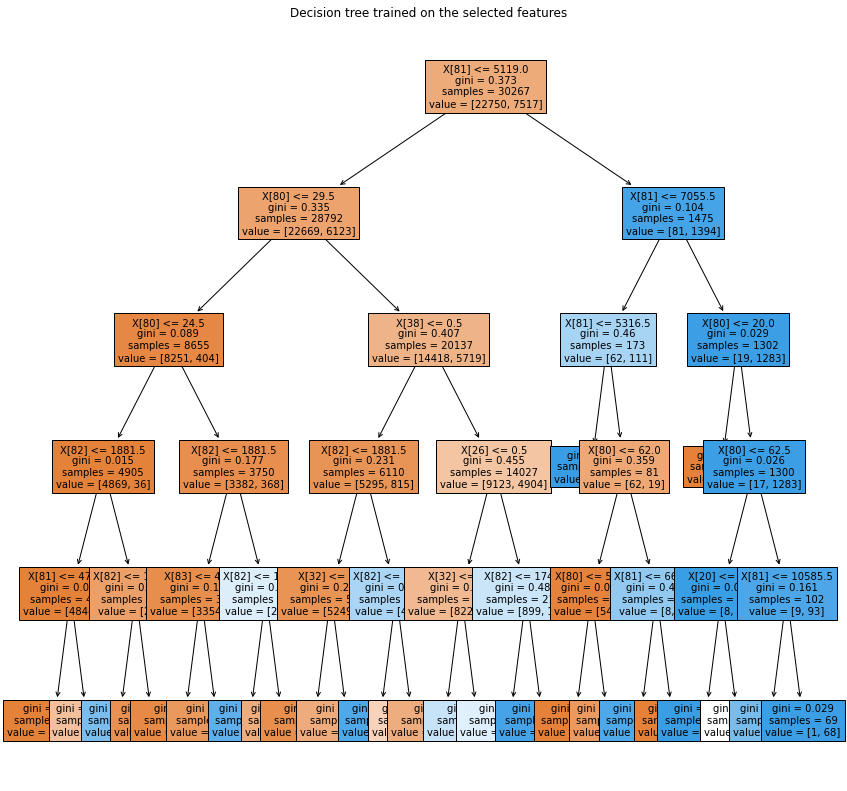

In [34]:
#Plot your decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(14,14))
plot_tree(clf, fontsize=10, filled=True)
plt.title("Decision tree trained on the selected features")
plt.show()